In [3]:
# Initial imports
from MCForecastTools import MCSimulation

%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import time
import datetime as dt
import pandas_datareader.data as web 


In [4]:
start = dt.datetime(2016, 5, 24)
end = dt.datetime(2021, 5, 24)

In [5]:
eth = web.DataReader(['ETH-USD'], 'yahoo', start, end)
eth.columns= eth.columns.swaplevel(0, 1)
eth.rename(columns= {'Close': 'close'}, inplace=True)
eth.sort_index(axis= 1, level=1, inplace=True)

data_dis = web.DataReader(['DIS'], 'yahoo', start, end)
data_dis.columns= data_dis.columns.swaplevel(0, 1)
data_dis.rename(columns= {'Close': 'close'}, inplace=True)
data_dis.sort_index(axis= 1, level=1, inplace=True)

data_baba = web.DataReader(['BABA'], 'yahoo', start, end)
data_baba.columns= data_baba.columns.swaplevel(0, 1)
data_baba.rename(columns= {'Close': 'close'}, inplace=True)
data_baba.sort_index(axis= 1, level=1, inplace=True)

data_spy = web.DataReader(['SPY'], 'yahoo', start, end)
data_spy.columns= data_spy.columns.swaplevel(0, 1)
data_spy.rename(columns= {'Close': 'close'}, inplace=True)
data_spy.sort_index(axis= 1, level=1, inplace=True)

data_tsla = web.DataReader(['TSLA'], 'yahoo', start, end)
data_tsla.columns= data_tsla.columns.swaplevel(0, 1)
data_tsla.rename(columns= {'Close': 'close'}, inplace=True)
data_tsla.sort_index(axis= 1, level=1, inplace=True)



In [6]:
# Create and empty DataFrame for closing prices
all_closing_prices = pd.DataFrame()

# Fetch the closing prices 
all_closing_prices["BABA"] = data_baba["BABA"]["close"]
all_closing_prices["SPY"] = data_spy["SPY"]["close"]
all_closing_prices["DIS"] = data_dis["DIS"]["close"]
all_closing_prices["TSLA"] = data_tsla["TSLA"]["close"]



# Drop the time component of the date
all_closing_prices.index = all_closing_prices.index.date

# Compute daily returns
all_returns = all_closing_prices.pct_change().dropna()

# Display
all_returns.head()

,BABA,SPY,DIS,TSLA
2016-05-25,-0.068171,0.006783,0.003517,0.007664
2016-05-26,0.036513,0.000287,-0.000501,0.025230
2016-05-27,0.033440,0.004299,0.004809,-0.009239
2016-05-31,0.012721,-0.001903,-0.010669,0.000852
2016-06-01,-0.064756,0.002049,-0.007055,-0.016440


In [20]:
eth_cl = pd.DataFrame()


# Fetch the closing prices 
eth_cl["ETH-USD"] = eth["ETH-USD"]["close"]

# Drop the time component of the date
eth_cl.index = eth_cl.index.date

eth_cl

,ETH-USD
2016-05-23,12.732300
2016-05-24,12.526000
2016-05-25,12.430400
2016-05-26,11.295800
2016-05-27,11.892900
...,...
2021-05-20,2430.621338
2021-05-21,2295.705566
2021-05-22,2109.579834
2021-05-23,2643.591064


In [14]:

results = pd.concat([eth_cl, all_returns], axis= 1, join = 'inner')
results.rename(columns= {'Close': 'close'}, inplace=True)
results.head()

,ETH-USD,BABA,SPY,DIS,TSLA
2016-05-25,12.4304,-0.068171,0.006783,0.003517,0.007664
2016-05-26,11.2958,0.036513,0.000287,-0.000501,0.025230
2016-05-27,11.8929,0.033440,0.004299,0.004809,-0.009239
2016-05-31,14.0015,0.012721,-0.001903,-0.010669,0.000852
2016-06-01,13.7380,-0.064756,0.002049,-0.007055,-0.016440


In [15]:
results.isnull().sum()

ETH-USD    0
BABA       0
SPY        0
DIS        0
TSLA       0
dtype: int64

<AxesSubplot:ylabel='Density'>

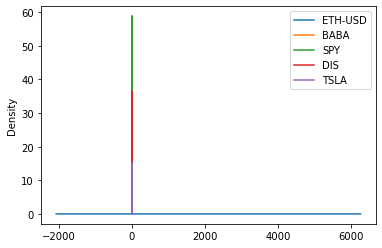

In [25]:
results.plot.density()

<AxesSubplot:title={'center':'Cumulative Returns'}>

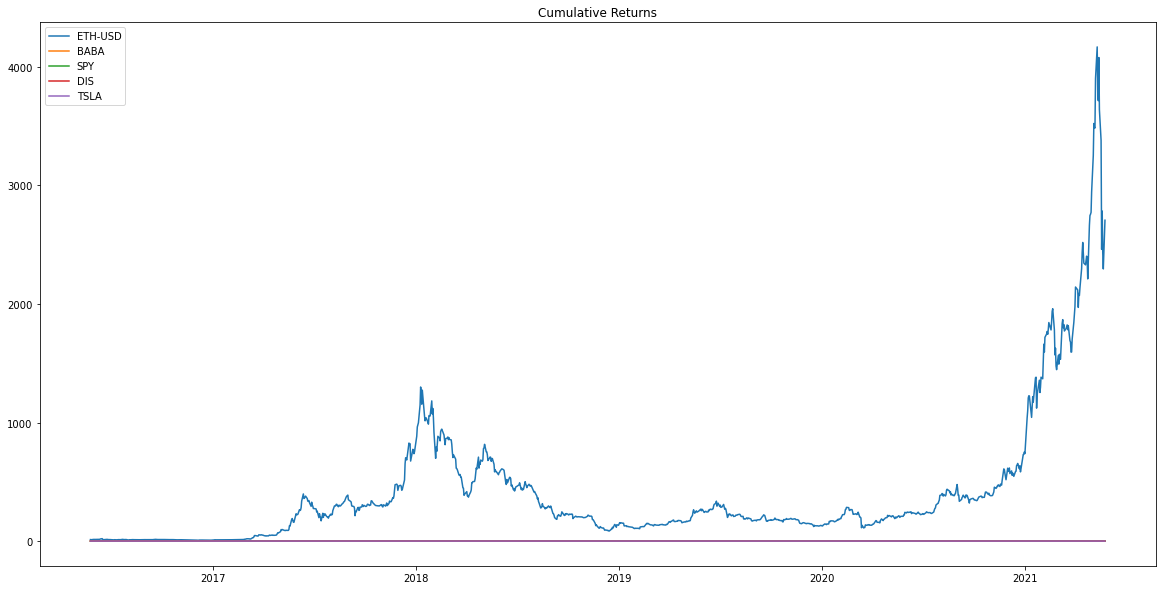

In [24]:
# Calculate Cumulative Returns
all_c = (1 + results).cumprod()

# Plot Cummulative Returns
results.plot(title = 'Cumulative Returns', figsize = (20,10) )

In [26]:
# Calculate Standard Deviation
all_std = results.std()

# Calculate Annual Standard Deviation
all_annual_std = all_std * np.sqrt(252)

# Display Standard Deviation
all_annual_std

ETH-USD    8908.074065
BABA          0.339044
SPY           0.188694
DIS           0.282302
TSLA          0.593582
dtype: float64

In [28]:
# Calculate Correlation
all_correlation = results.corr()

<AxesSubplot:>

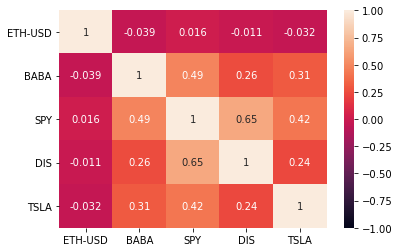

In [29]:
# Plot Correlation 
sns.heatmap(all_correlation, vmin = -1, vmax = 1, annot = True)